# One-Legged Hopper

In this set, we're going to spend some time with the [one-legged hopper](http://www.ai.mit.edu/projects/leglab/robots/3D_hopper/3D_hopper.html). This system (which is discussed in great detail in [this paper](http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6313238) -- you can reference that paper for some parts of this set!) enables extremely dynamic walking behavior that bounces between *stance phases* when the foot is on the ground, and *flight phases* when the foot is in the air. The system is dramatically underactuated in both phases, but as you'll see in this problem set, it can still be stabilized!

## Dynamics
The (planar) one-legged hopper consists of a body with mass $m_b$ and a foot with a mass $m_f$, with the connection between the foot and the body being a single (actuated, torque-controlled) pin joint, and the leg being springy with controllable spring constant.

<p align="center">
  <img src="./planar_hopper.png" width="350"/>
</p>

The planar one-legged hopper, diagramed above, has state

$$ \mathbb{x} = \left[ \begin{array} \\ q \\ \dot q \end{array}\right] \ \ \ q = \left[\begin{array}\\ x \\ z \\ \theta \\ \alpha \\ l\end{array}\right] $$

for floating base coordinates $x, z, \theta$, hip angle $\alpha$, and leg extension $l$ limited to $\left[-\infty, l_{max}\right]$. This joint limit is implemented with a highly damped one-sided (i.e., only active when the limit is exceeded) spring. The "springiness" in the leg is represented by a force $f_{spring} = K_l * (l_{rest} - l)$ that pushes the foot back to full extension when it is compressed. **The system has two control inputs: instantaneous control of $l_{rest}$, and direct torque control of the leg angle.**

This system is hybrid due to the joint limit and ground contact, and (usually) oscillates between two contact modes:

1) **Flight**: When the foot is not in contact with the ground and the leg is fulled extended to $l = l_{max}$ (these usually occur simultaneously, as in flight there's nothing stopping the leg from passively extending). In this mode, the whole assembly flies through the air under the influence of gravity.

2) **Stance**: When the foot is in contact with the ground, a ground reaction force (also represented with a highly damped one-sided spring) pushes the foot out of collision with the ground.

## Controlling the Hopper

As discussed in lecture, one might think about controlling this system by separating it into three separate control problems:

1) Controlling the hopping height of the body by pushing off the ground while in stance phase

2) Controlling the horizontal velocity of the body by choosing where to place the foot during the next stance phase (which requires exerting torque during flight phase to aim the leg)

3) Controlling the angular velocity of the body by applying a torque to the leg while in stance phase

In this section we'll play with a planar model of the 1D hopper. **We've supplied a controller that will take care of regulating the hopping height (using Raibert's very simple controller) by modifying the spring rest length.**


## What you have to do

Peruse the provided 1d hopper controller class in *hopper_2d.py* and understand what it is currently accomplishing. The *Hopper2dController* system implements a controller for the planar 2d hopper, and the *Simulate2dHopper* function loads in the 2d hopper from a robot description file, hooks up the controller, and runs a simulation. The controller calculates its output in *_DoCalcVectorOutput*, but dispatches its decision making to two other methods: 

- *ChooseSpringRestLength* picks the instantaneous rest length of the spring. We've written this for you, implementing something like Raibert's original hopper height controller.
- *ChooseThighTorque* picks a leg angle torque (which directly controls $\ddot \alpha$). You have to write this one!

**Fill in ChooseThighTorque with a leg angle torque controller that lateral velocity to the desired lateral velocity, and also keeps the body steady ($\theta = 0$).** Comment your code thoroughly explaining what your controller is doing -- we reserve the right to dock points for functional but seemingly arbitrary code! The code snippets below are here to help you test your system (feel free to change the initial condition, the simulation duration, the lateral velocity target, the xlim and ylim of the visualizer, etc...). As usual, a battery of tests will be used to help validate your system -- feel free to peruse (but don't modify) *test_set_4.py* to see the conditions we're testing.

### Advice:
- While you're very welcome to explore (any method that passes the tests is technically OK!), I recommend implementing one of the three controllers described in Section IV of [this paper](http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6313238&tag=1). In particular, the 3rd controller ("Servo Attitude") we found to be particularly effective and simple to implement. Like many "intuitive"-style controllers, it has a handful of parameters that must be estimated (e.g. the typical duration of flight and stance phases), which you are free to infer from looking at simulation runs and hard-coding.
- Gain tuning will undoubtedly be a stumbling block here. Start as simple as you can: for example, focus first on controlling lateral velocity to 0 (i.e. just maintain balance), then controlling lateral velocity to reasonable speeds, and then finally controlling the body angle to near zero. Only try to tune one number at a time!
- Friction with the ground is *not infinite*, so if you see the foot slipping, fix your foot placement or limit your leg angle torques.

<IPython.core.display.Javascript object>


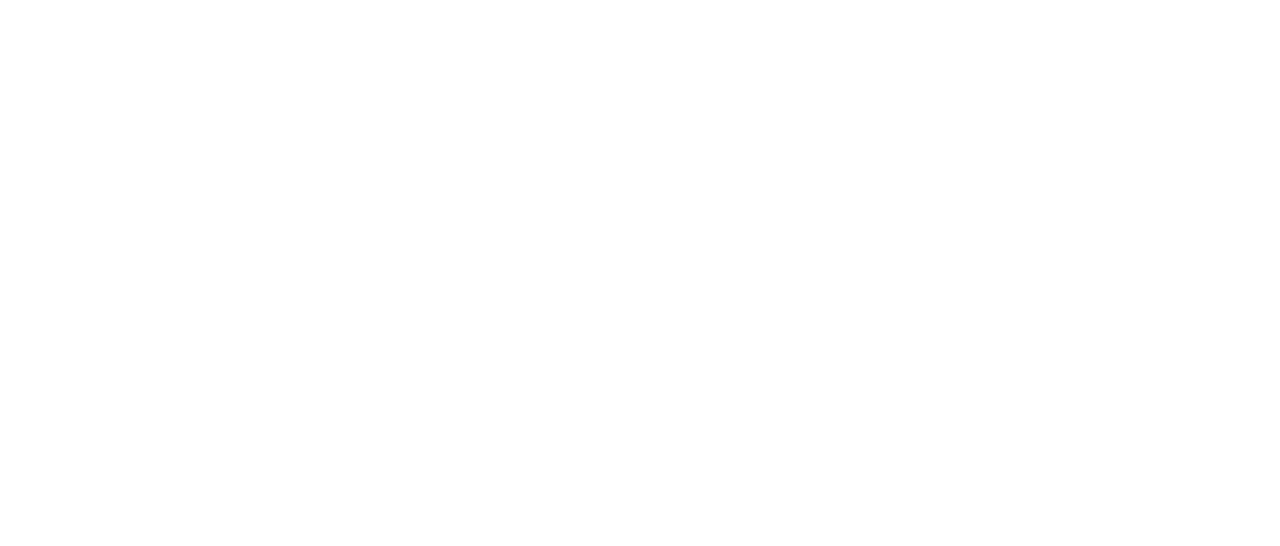

t:  0.0
START: -6.264
0.0
previous_velocity_along_leg_frame
0.0
-6.26418390534633
0.0
0.0
done
-6.26418390534633
0.0
LIFTED OFF!
START: -6.264
0.013034364783429453
previous_velocity_along_leg_frame
0.0
-6.2638491628482065
0.0
0.0816499189512002
done
-6.2638491628482065
0.0816499189512002
LIFTED OFF!
START: -6.265
0.020727842122677087
previous_velocity_along_leg_frame
0.0
-6.263337322785311
0.0
0.1298440632703789
done
-6.263337322785311
0.1298440632703789
LIFTED OFF!
START: -6.265
0.02516757509177725
previous_velocity_along_leg_frame
0.0
-6.262935753490276
0.0
0.15765619411366497
done
-6.262935753490276
0.15765619411366497
LIFTED OFF!
START: -6.265
0.027704500857673064
previous_velocity_along_leg_frame
0.0
-6.2626713863473435
0.0
0.1735485888579488
done
-6.2626713863473435
0.1735485888579488
LIFTED OFF!
START: -6.265
0.029142830308879653
previous_velocity_along_leg_frame
0.0
-6.262510222828409
0.0
0.18255895837654973
done
-6.262510222828409
0.18255895837654973
LIFTED OFF!
START: -6.265


LIFTED OFF!
START: -7.560
0.46029505779903435
previous_velocity_along_leg_frame
0.40196091262799993
-6.773097598478349
0.8107053073159052
3.358212247328973
done
-6.371136685850349
4.168917554644878
LIFTED OFF!
START: -7.560
0.46042967856412975
previous_velocity_along_leg_frame
0.4020700467540894
-6.772748618882901
0.8106511876843673
3.359175185601786
done
-6.370678572128812
4.169826373286154
LIFTED OFF!
START: -7.560
0.4605386102095059
previous_velocity_along_leg_frame
0.402158349936113
-6.772466153030409
0.810607384723069
3.3599543557469067
done
-6.370307803094296
4.170561740469976
LIFTED OFF!
START: -7.560
0.4606267656368237
previous_velocity_along_leg_frame
0.4022298078137451
-6.772237508302125
0.8105719291321583
3.3605849074367233
done
-6.37000770048838
4.171156836568882
LIFTED OFF!
START: -7.560
0.4606981144738893
previous_velocity_along_leg_frame
0.4022876401543908
-6.772052419496062
0.8105432284399903
3.3610952398976233
done
-6.369764779341671
4.171638468337614
LIFTED OFF!
START

0.8908531579337555
2.3798179718717063
done
-7.066340083527852
3.2706711298054616
LIFTED OFF!
START: -7.730
0.31295045229458474
previous_velocity_along_leg_frame
0.28826549463675155
-7.354601321302539
0.8908527066416229
2.379829765274833
done
-7.066335826665787
3.2706824719164556
LIFTED OFF!
START: -7.730
0.3129514682860597
previous_velocity_along_leg_frame
0.28826639973535817
-7.3545994638223355
0.8908524137658781
2.379837418826181
done
-7.066333064086978
3.2706898325920593
LIFTED OFF!
START: -7.730
0.31295212763472335
previous_velocity_along_leg_frame
0.2882669871176441
-7.354598258368829
0.890852223697619
2.379842385756085
done
-7.066331271251185
3.2706946094537037
LIFTED OFF!
START: -7.730
0.3129525555334072
previous_velocity_along_leg_frame
0.28826736831211164
-7.354597476062101
0.890852100348473
2.379845609153313
done
-7.066330107749989
3.270697709501786
LIFTED OFF!
START: -7.730
0.31295283322789236
previous_velocity_along_leg_frame
0.2882676156968159
-7.354596968365943
0.89085202

LIFTED OFF!
START: -7.458
0.5595620737416094
previous_velocity_along_leg_frame
0.6032387036287632
-6.320139887720144
0.9631175528205952
3.9585541572316454
done
-5.71690118409138
4.921671710052241
LIFTED OFF!
START: -7.458
0.559844657243302
previous_velocity_along_leg_frame
0.6035108406704174
-6.319269155687776
0.9629470490635136
3.9604954854794125
done
-5.715758315017358
4.923442534542926
LIFTED OFF!
START: -7.458
0.5600974399901184
previous_velocity_along_leg_frame
0.6037542377860212
-6.318489833986876
0.9627944611713672
3.9622319898228753
done
-5.714735596200854
4.925026450994243
LIFTED OFF!
desired_liftoff_beta: 			0.7109899897542992
desired_liftoff_minus_speed: 		7.736924453553879
current_desired_touchdown_beta: 	None
Hop #1.0
self.current_desired_l_at_bottom: 	-0.05417745497688073
touchdown_beta: 			0.5859560675394773
liftoff_beta: 				1.7747583169404875
t:  3.0
START: -3.810
1.8637349440046613
previous_velocity_along_leg_frame
-0.12323255718117264
1.1002534512172328
0.03716889942

0.1317636815415444
3.679271101726197
done
3.222691940509212
3.8110347832677416
LIFTED OFF!
START: -5.007
2.321079435642525
previous_velocity_along_leg_frame
-0.14277649106470855
3.4139176301597325
0.13308559534981243
3.662508919443618
done
3.271141139095024
3.7955945147934305
LIFTED OFF!
START: -5.026
2.33031282169347
previous_velocity_along_leg_frame
-0.14154159165422456
3.461025550839594
0.13439821398498408
3.6449819584396272
done
3.3194839591853698
3.779380172424611
LIFTED OFF!
START: -5.046
2.339560166662369
previous_velocity_along_leg_frame
-0.14029273091181338
3.5080002577829896
0.1357013328735954
3.626691984390098
done
3.3677075268711762
3.7623933172636934
LIFTED OFF!
START: -5.065
2.348821190901214
previous_velocity_along_leg_frame
-0.1390299993728742
3.5548289899989283
0.13699474940574702
3.6076409818192112
done
3.415798990626054
3.744635731224958
LIFTED OFF!
desired_liftoff_beta: 			2.358822737588419
desired_liftoff_minus_speed: 		7.736924453553879
current_desired_touchdown_b

liftoff_beta: 				2.174118875045551
liftoff_beta: 				2.1738953743471248
liftoff_beta: 				2.173677150097696
liftoff_beta: 				2.1733570556005164
liftoff_beta: 				2.173149768528595
liftoff_beta: 				2.172947696684674
liftoff_beta: 				2.172750867428065
liftoff_beta: 				2.1725592957553577
liftoff_beta: 				2.1723729873286652
liftoff_beta: 				2.1721919407930312
liftoff_beta: 				2.172015666694646
liftoff_beta: 				2.1718439110695535
liftoff_beta: 				2.1716773923717927
liftoff_beta: 				2.1715160949883865
liftoff_beta: 				2.171284941990627
liftoff_beta: 				2.1711383348774316
liftoff_beta: 				2.1709298043774132
liftoff_beta: 				2.1707357259443256
liftoff_beta: 				2.170556441940123
liftoff_beta: 				2.1703406569771837
liftoff_beta: 				2.170113066660937
liftoff_beta: 				2.169731669177279
liftoff_beta: 				2.169148278520913
liftoff_beta: 				2.168864080640631
liftoff_beta: 				2.1685853023077786
liftoff_beta: 				2.1683123654839567
liftoff_beta: 				2.1680452471194496
liftoff_beta:

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import hopper_2d
import numpy as np
import matplotlib.pyplot as plt
import math

# x0 = np.zeros(10)
# x0[1] = 1.5
# x0[4] = 0.5
# x0[5] = 0.1

lift_off_plus_state = np.zeros(10)
lift_off_plus_state[1] = 3.5  # height
# lift_off_plus_state[2] = -0.1
# lift_off_plus_state[2] = -0.15  # alpha
lift_off_plus_state[4] = 0.5  # l distance
# lift_off_plus_state[0+5] = 1.0  # xd
hopper, controller, state_log, animation = hopper_2d.Simulate2dHopper(x0 = lift_off_plus_state,
                           
                                                                      duration=5.0,
                               desired_lateral_velocity = 1.0,
#                                                                       actuators_off=True,
                               print_period = 1.0)
print('Done')

In [3]:
from IPython.display import HTML
HTML(animation.to_jshtml())

<IPython.core.display.Javascript object>


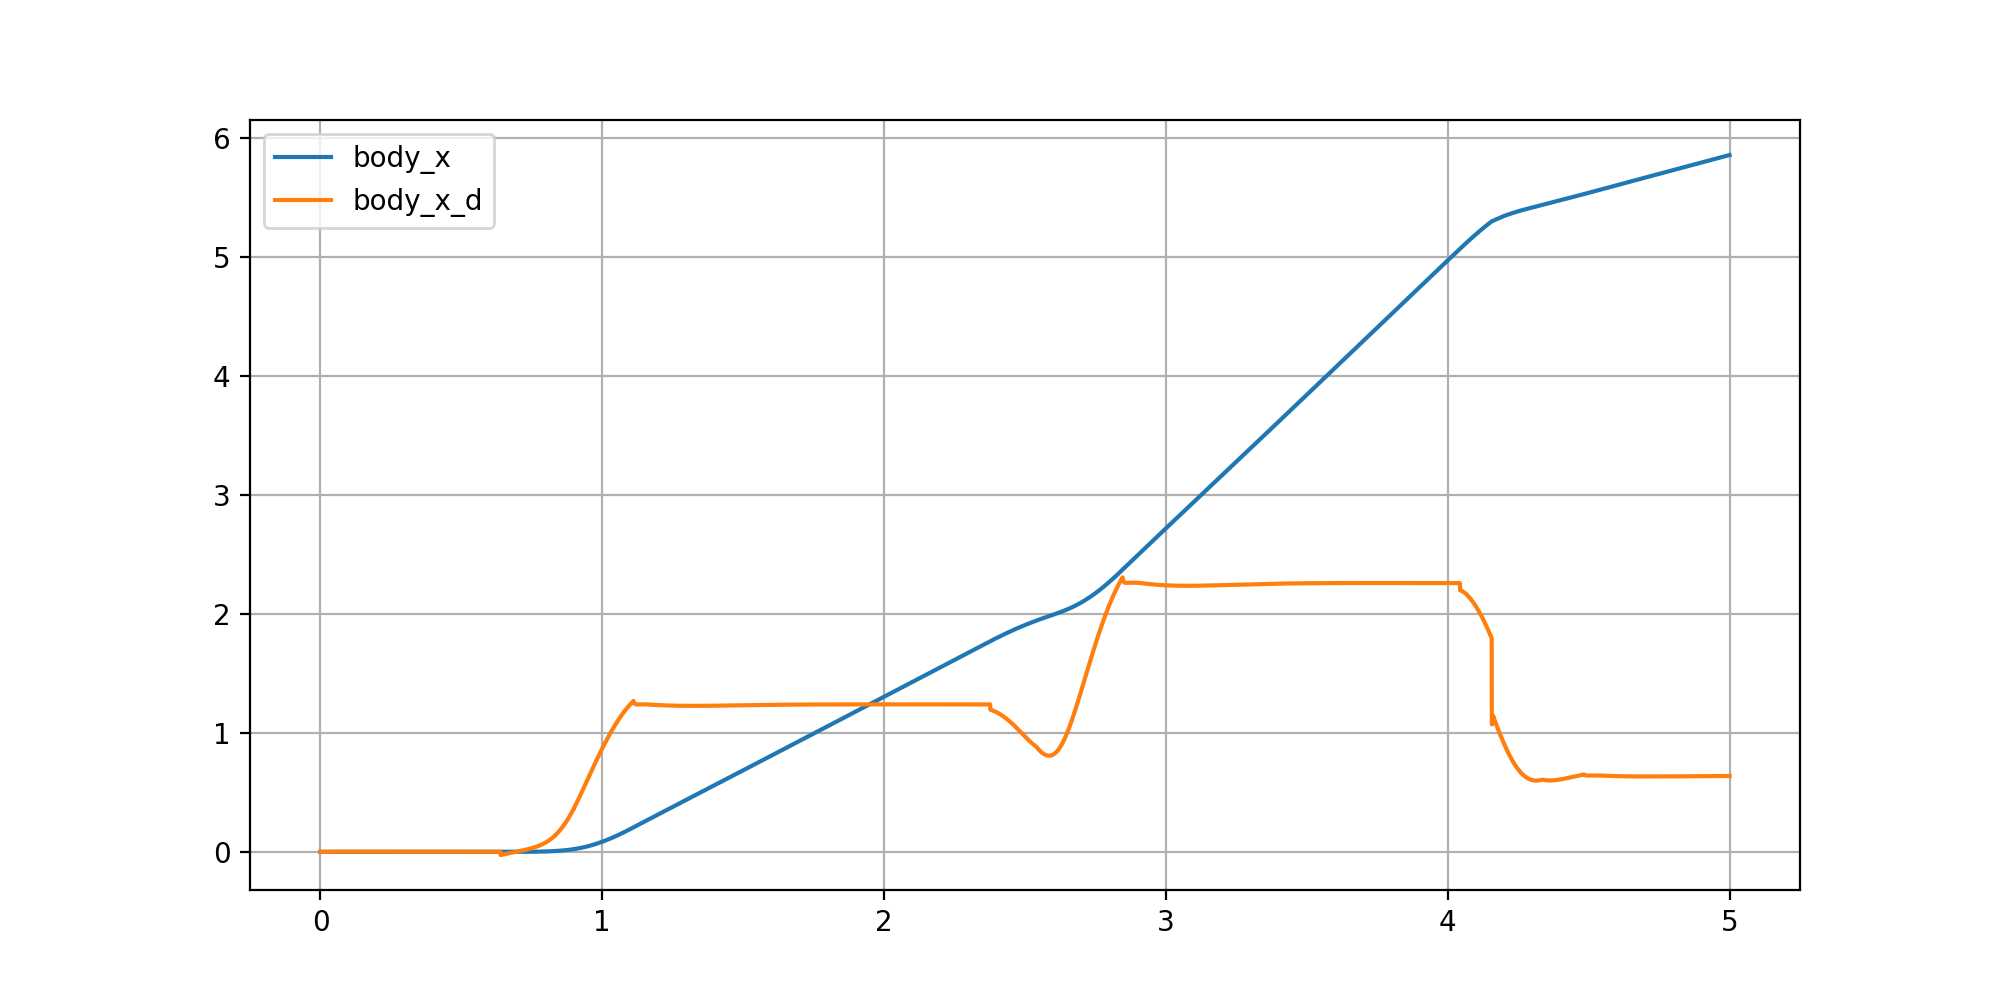

<IPython.core.display.Javascript object>


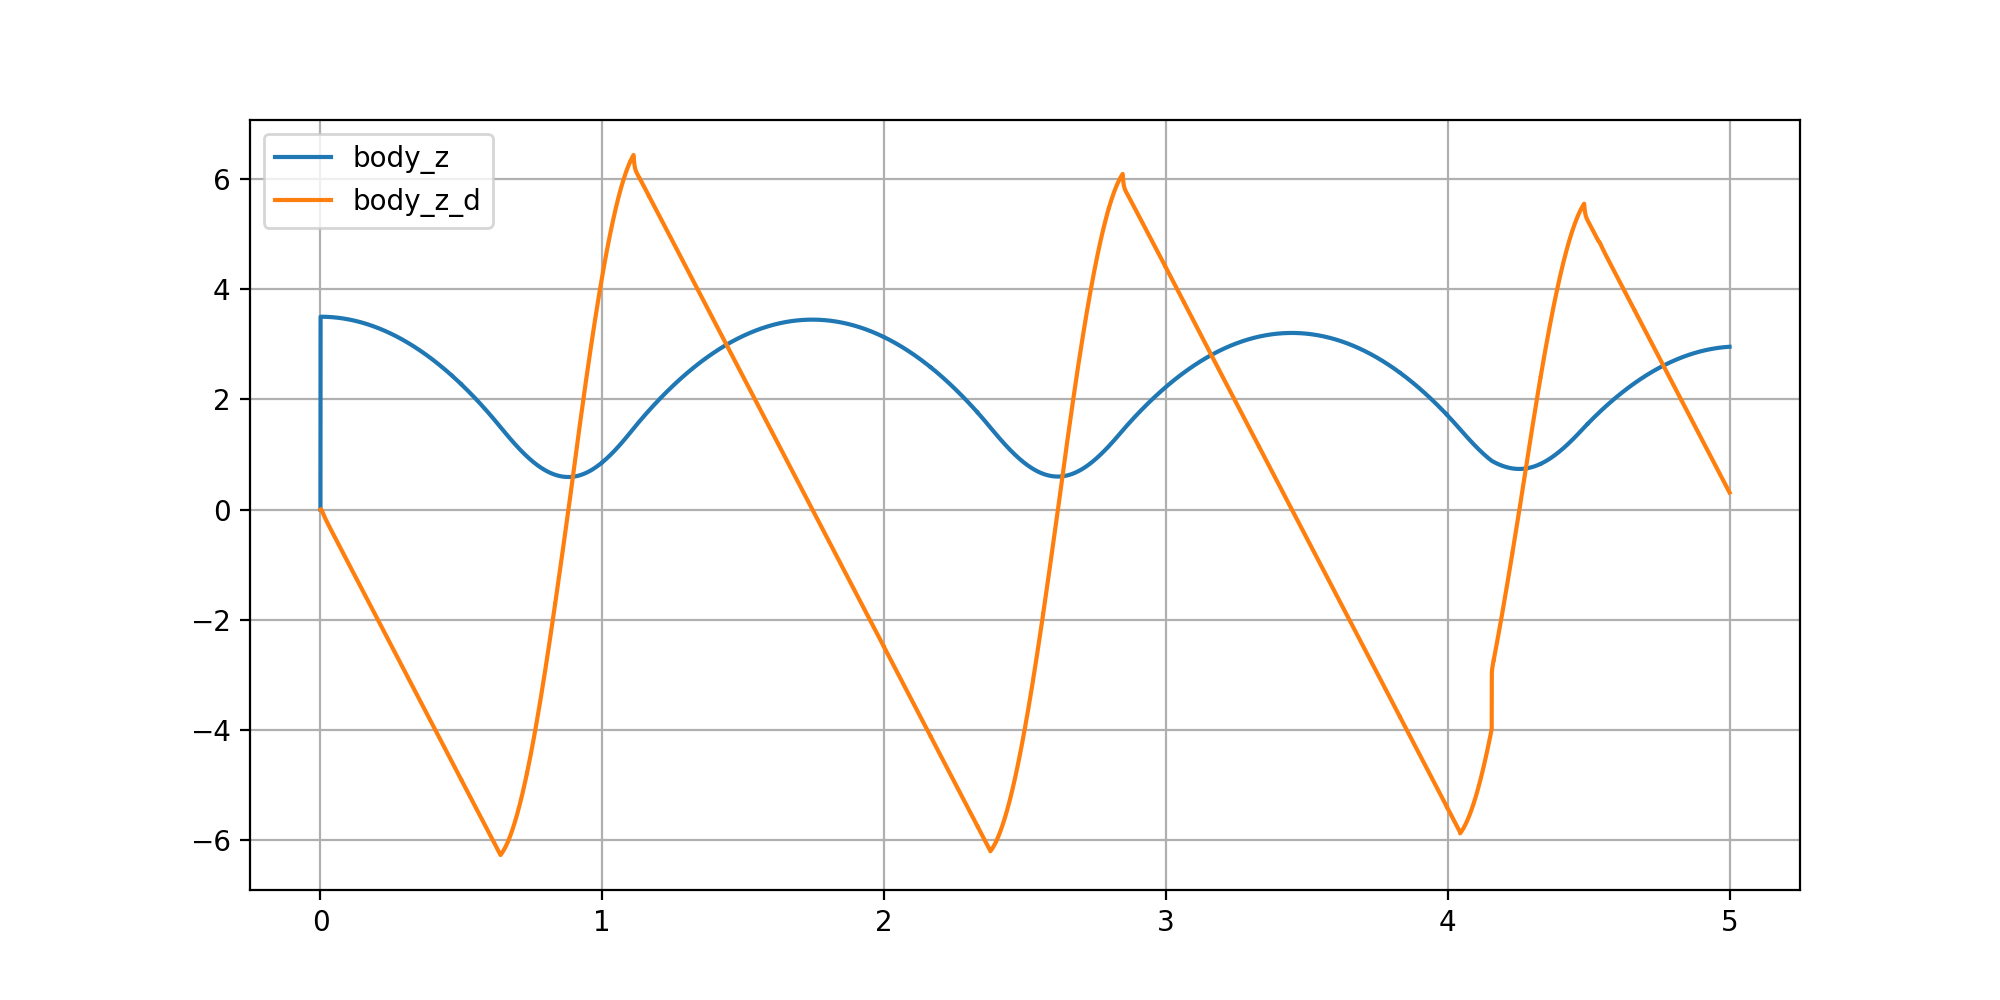

<IPython.core.display.Javascript object>


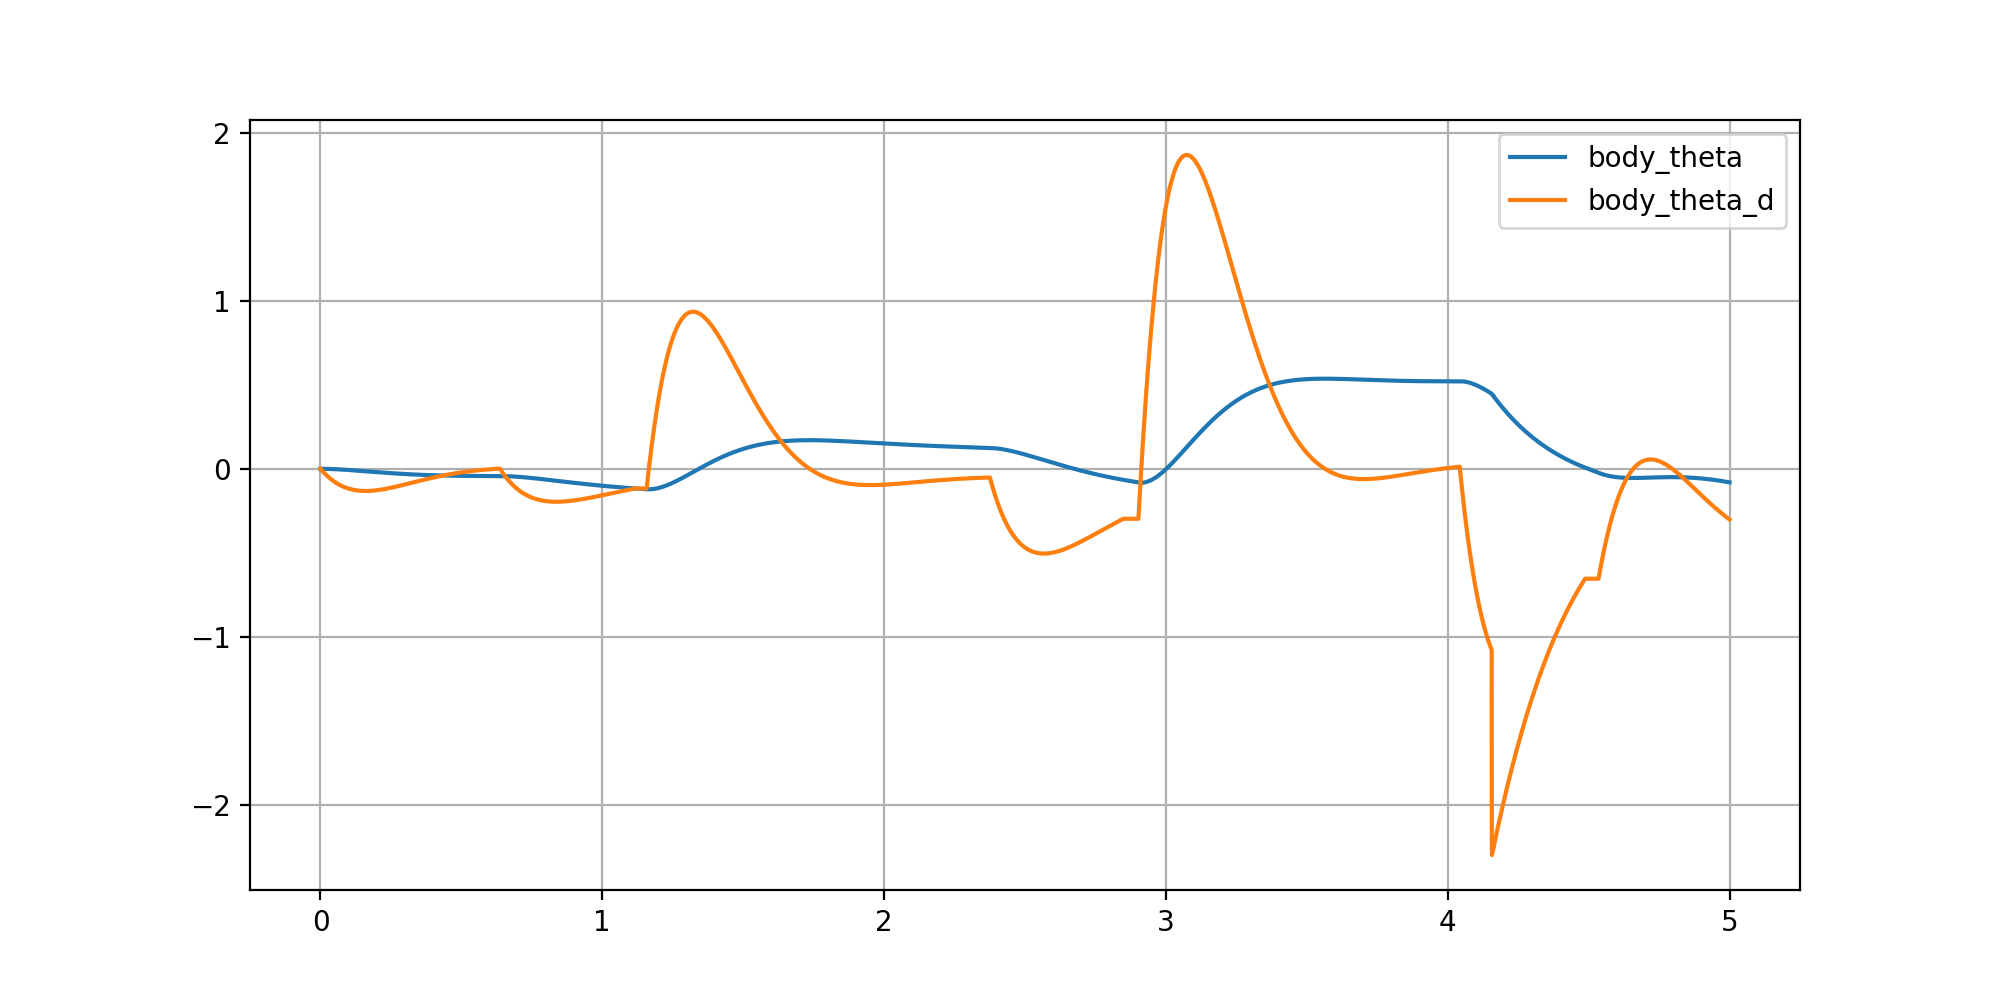

<IPython.core.display.Javascript object>


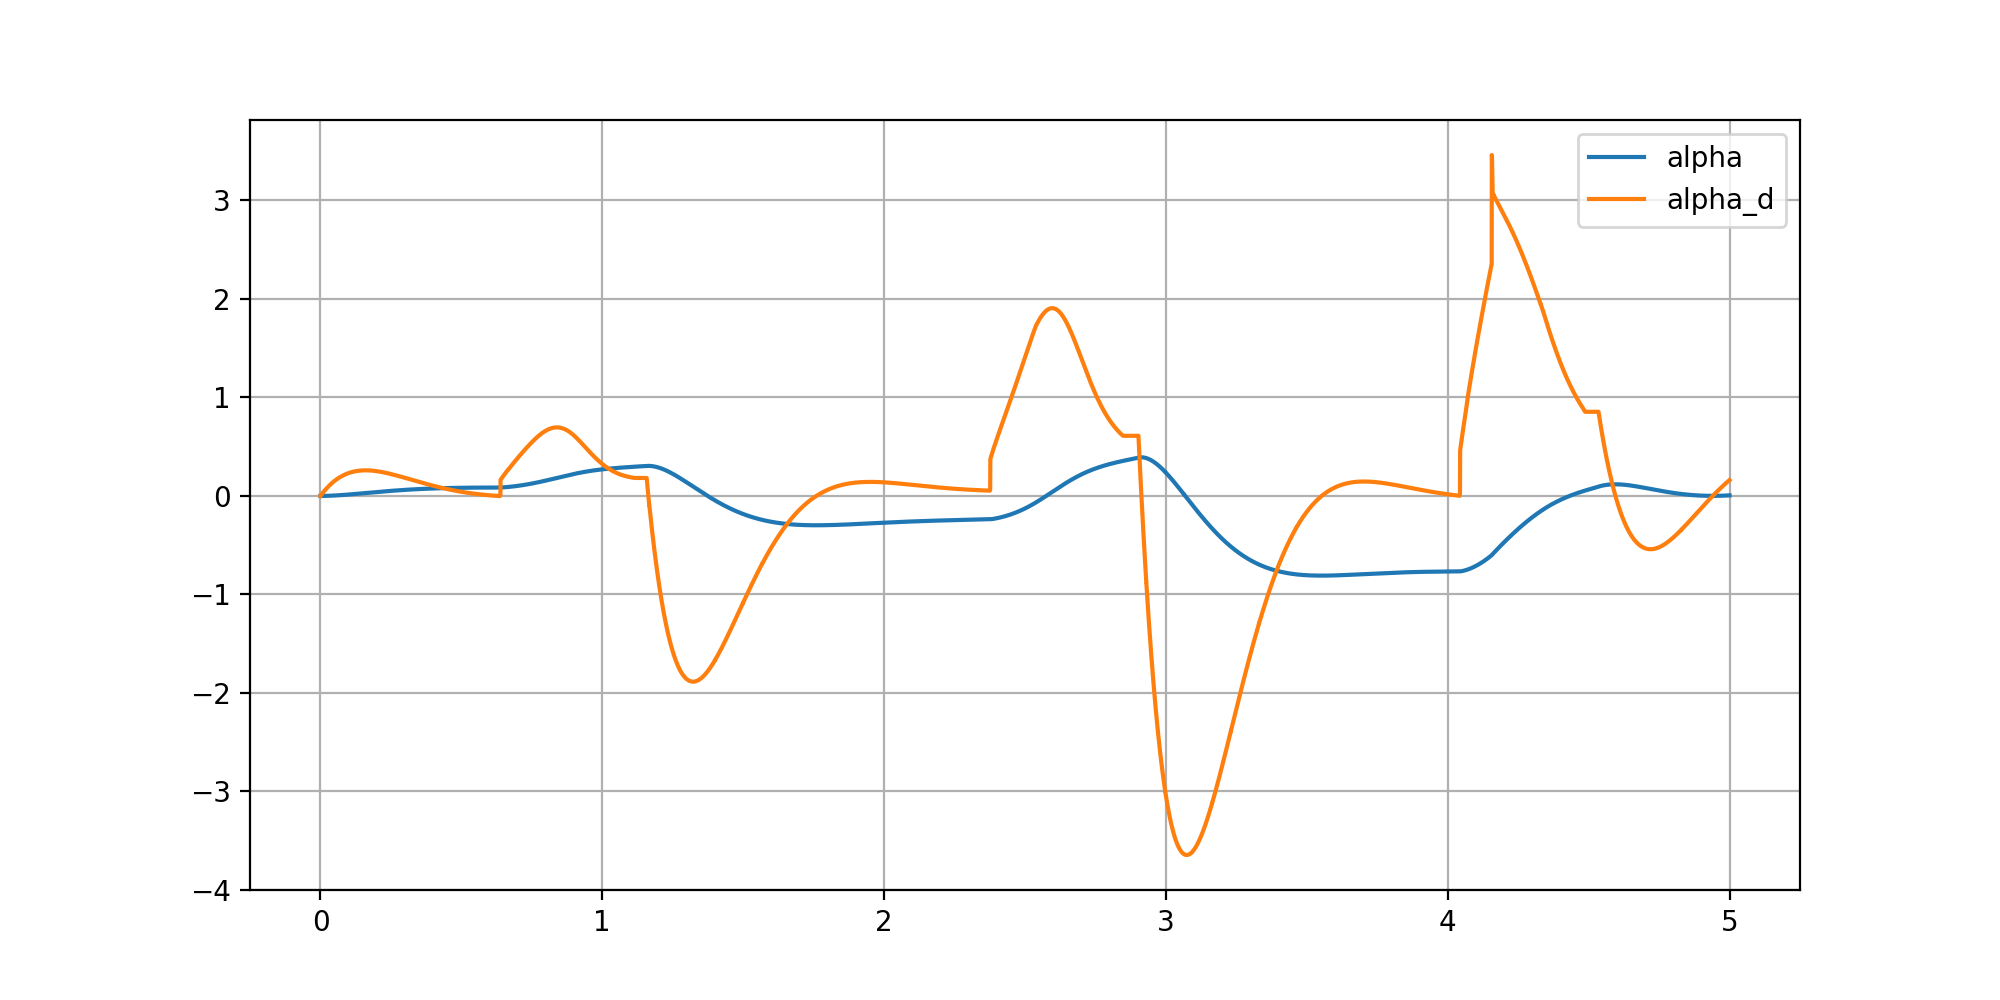

<IPython.core.display.Javascript object>


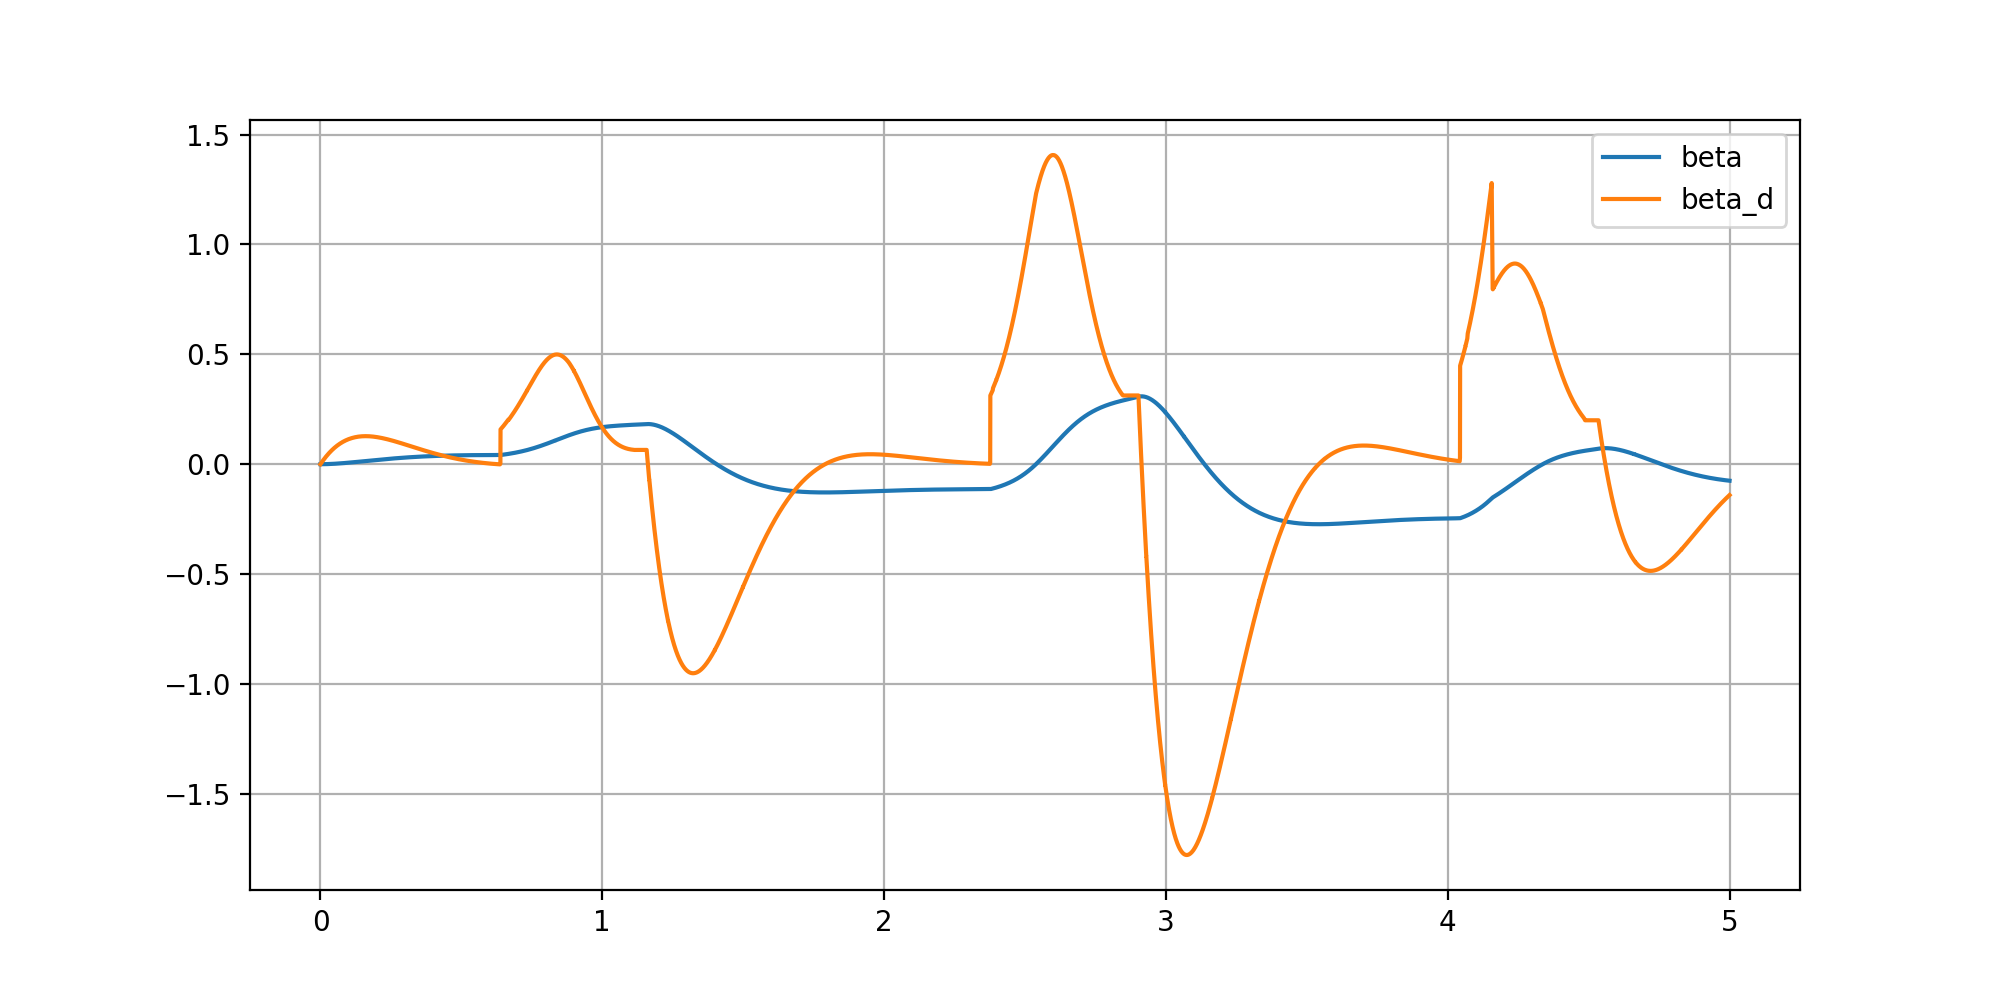

<IPython.core.display.Javascript object>


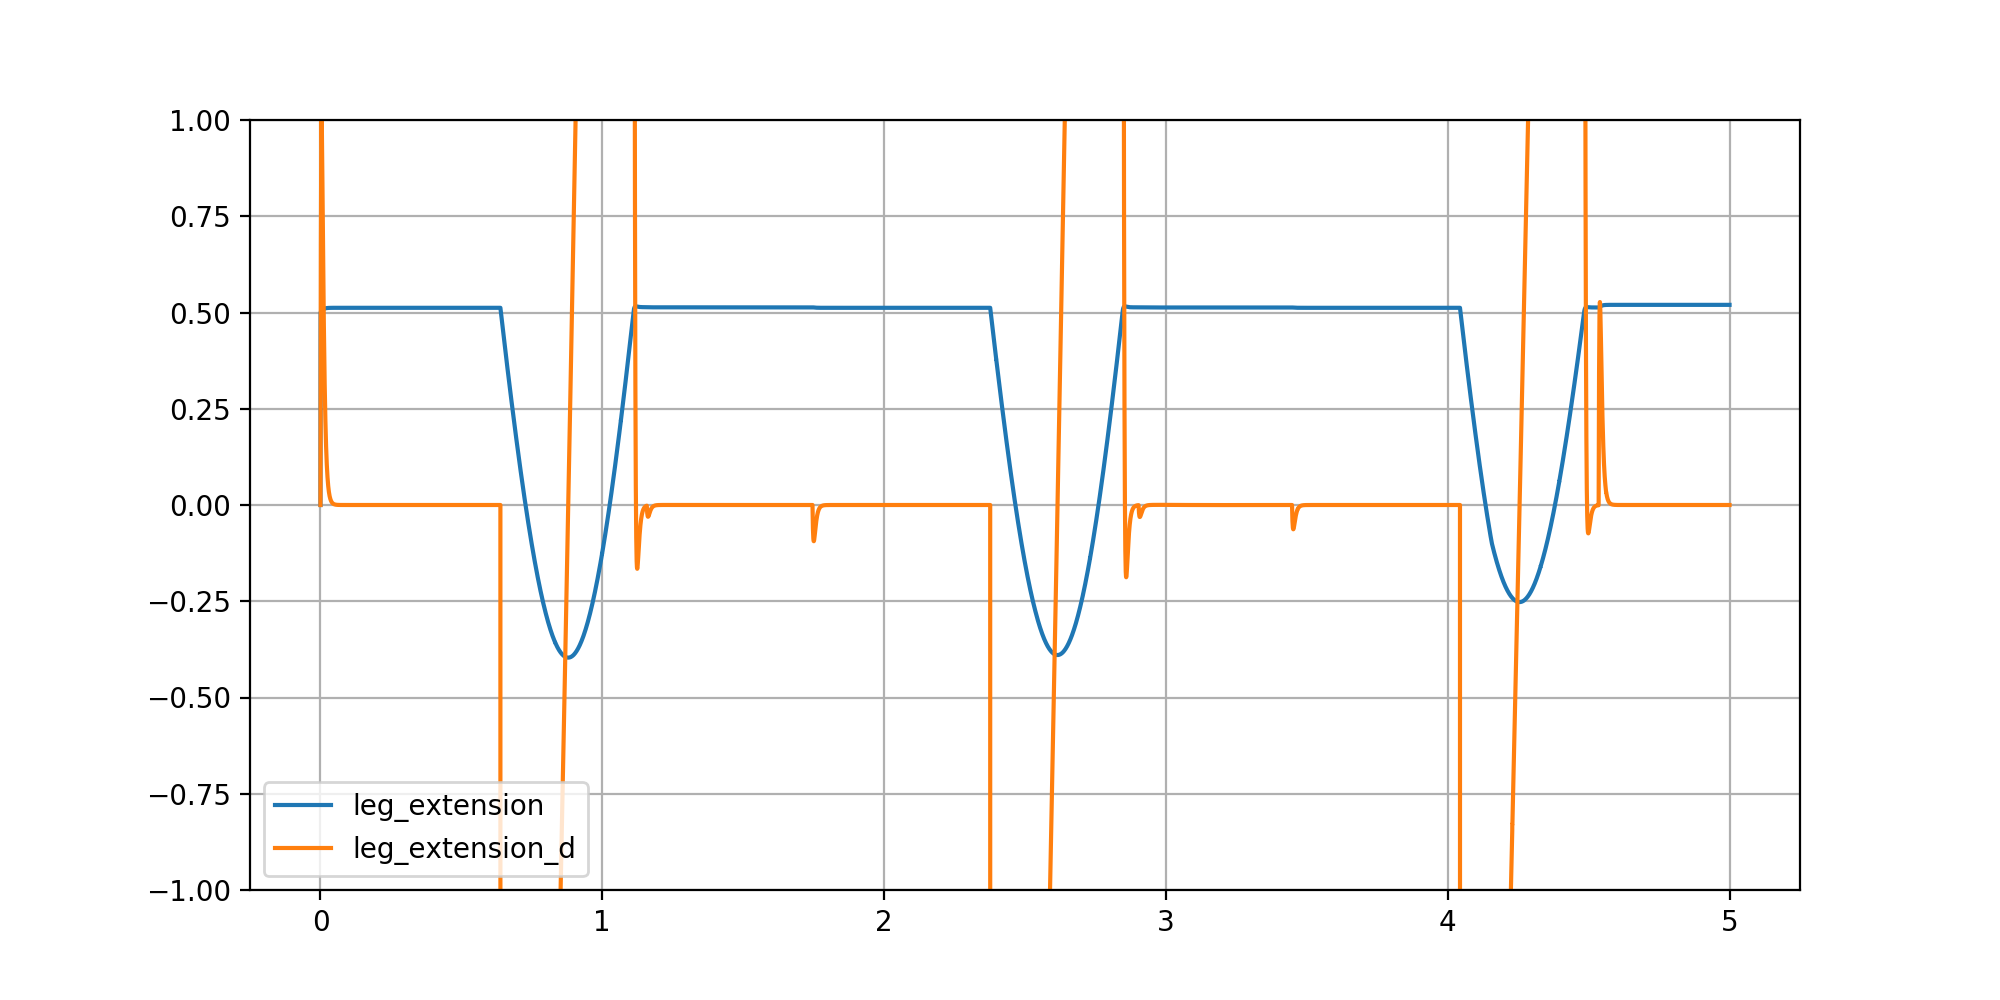

In [94]:
# Plot traces of certain states
plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[0, :])
plt.plot(state_log.sample_times(), state_log.data()[0+5, :])
plt.grid(True)
plt.legend(["body_x", "body_x_d"])

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[1, :])
plt.plot(state_log.sample_times(), state_log.data()[1+5, :])
plt.grid(True)
plt.legend(["body_z", "body_z_d"])

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[2, :])
plt.plot(state_log.sample_times(), state_log.data()[2+5, :])
plt.legend(["body_theta", "body_theta_d"])
plt.grid(True)

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[3, :])
plt.plot(state_log.sample_times(), state_log.data()[3+5, :])
plt.legend(["alpha", "alpha_d"])
plt.grid(True)

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), np.add(state_log.data()[2, :], state_log.data()[3, :]))
plt.plot(state_log.sample_times(), np.add(state_log.data()[2+5, :], state_log.data()[3+5, :]))
plt.legend(["beta", "beta_d"])
plt.grid(True)

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[4, :])
plt.plot(state_log.sample_times(), state_log.data()[4+5, :])
plt.legend(["leg_extension", "leg_extension_d"])
plt.ylim([-1.0, 1.0])
plt.grid(True)
plt.show()
